__Cuaderno de trabajo de:__ Israel Carrera Manzaneque

In [2]:
import random
import math 
import hashlib
import matplotlib.pyplot as plt
import numpy as np

### Números pseudo-aleatorios

Cualquier lenguaje de programación tiene una función random, que cuando la llamamos nos devuelve un número pseudo-aleatorio entre 0 y 1. Todos los números entre 0 y 1 son *"igualmente probables"

In [3]:
random.random?

In [4]:
#Cada vez que ejecutamos este código obtenemos un número distinto:
random.random()

0.41210023429910236

In [5]:
#Generamos 10 números pseudo-aleatorios y los imprimimos
for i in range(10):
    print(random.random())

0.10358388782431138
0.5720713769889602
0.4534717110556785
0.2309832168386724
0.25410534483114056
0.018858501574496422
0.8213259951141944
0.9909161667485948
0.004087356069779169
0.20791249851941984


Además, python nos ofrece otras funciones prácticas:

 - ``random.randint(a,b)`` devuelve un número entero entre a y b (inclusive). Todos los números entre a y b son *"igualmente probables"*.
 - ``random.choice(lista)`` devuelve un elemento de ``lista`` (que debe ser una lista, cadena de caracteres, conjunto...). Todos los elementos son *"igualmente probables"*.

In [6]:
for i in range(10):
    print (random.randint(10,20))

10
14
11
17
19
18
15
20
12
12


In [7]:
for i in range(10):
    
    print(random.choice([[1,3,2],[4,2]]))

[1, 3, 2]
[4, 2]
[1, 3, 2]
[4, 2]
[1, 3, 2]
[4, 2]
[1, 3, 2]
[1, 3, 2]
[4, 2]
[4, 2]


### Semilla aleatoria

Estos números parecen aleatorios, pero **el ordenador los obtiene aplicando reglas deterministas**. Sólo parecen aleatorios, pero *la cpu no lanza dados cuando llamamos a random*.

Esto no es un inconveniente en la práctica, porque son casi imposibles de distinguir de números auténticamente aleatorios.
De hecho, es una virtud, porque si fijamos la **semilla aleatoria**, podemos obtener exactmente los mismos números, aunque hagamos el cálculo en máquinas distintas varios años después.

In [8]:
#Si cambias la semilla, las elecciones cambian, pero con la misma semilla
#obtenemos los mismos resultados
random.seed(1)
for i in range(10):
    print (random.random())
for i in range(10):
    print (random.randint(10,20))
for i in range(10):
    print(random.choice('AEIOU'))
for i in range(10):
    print(random.choice(["hola","adiós","¿Qué tal?", "ahora vengo"]))

0.13436424411240122
0.8474337369372327
0.763774618976614
0.2550690257394217
0.49543508709194095
0.4494910647887381
0.651592972722763
0.7887233511355132
0.0938595867742349
0.02834747652200631
16
16
19
10
17
14
13
19
11
15
A
A
A
U
A
O
E
O
A
U
adiós
ahora vengo
ahora vengo
adiós
¿Qué tal?
adiós
adiós
ahora vengo
¿Qué tal?
hola


### Distribuciones de números aleatorios

El bloque de funciones de distribuciones ofrece numerosas funciones que permiten generar un array de números aleatorios a partir de distribuciones de todo tipo, vamos algunos ejemplos:

#### Distribución uniforme

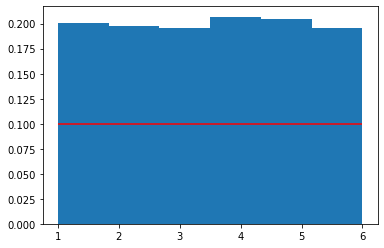

In [9]:
N_puntos = 10000
ini = 1
fin = 6
bins = 6

x = np.random.uniform(ini, fin, N_puntos)
plt.hist(x, bins,density=True)  #desity=True integra la curva a 1
plt.hlines(1/10, ini, fin, linestyles ="-", colors ="r")
plt.show() 

#### Distribución normal

Es una distribución gausiana
$$p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }$$

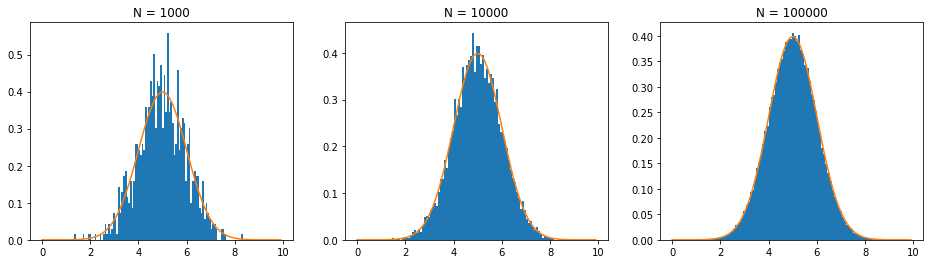

In [10]:
ini = 0
fin = 10
bins = 100
sigma = 1.0
mu = 5.0


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

N_puntos = 1000
x = np.random.normal(mu, sigma, N_puntos)
ax1.hist(x, bins,density=True)
ax1.set_title("N = "+str(N_puntos))

N_puntos = 10000
x = np.random.normal(mu, sigma, N_puntos)
ax2.hist(x, bins,density=True)
ax2.set_title("N = "+str(N_puntos))

N_puntos = 100000
x = np.random.normal(mu, sigma, N_puntos)
ax3.hist(x, bins,density=True)
ax3.set_title("N = "+str(N_puntos))

x = np.arange(0, 10, 0.1)
y=[]
for i in range(len(x)):
    y.append(1/math.sqrt(2*math.pi*sigma**2)*math.exp(-((x[i]-mu)**2)/(2*sigma**2)))
ax1.plot(x,y)
ax2.plot(x,y)
ax3.plot(x,y)

plt.show() 

#### Distribución exponencial

Es una distribución exponencial
$$  f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta})  $$

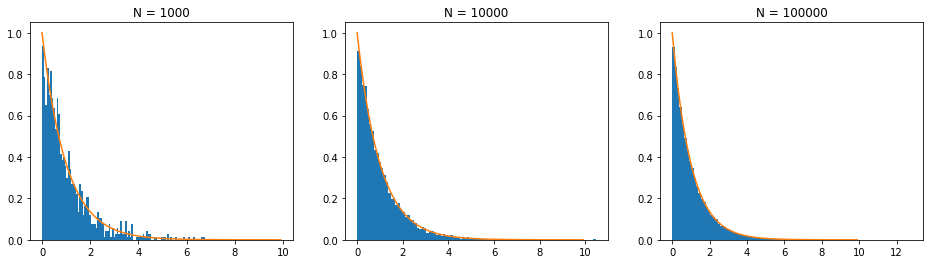

In [11]:
ini = 0
fin = 10
bins = 100
beta = 1.0

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

N_puntos = 1000
x = np.random.exponential(beta, N_puntos)
ax1.hist(x, bins,density=True)
ax1.set_title("N = "+str(N_puntos))

N_puntos = 10000
x = np.random.exponential(beta, N_puntos)
ax2.hist(x, bins,density=True)
ax2.set_title("N = "+str(N_puntos))

N_puntos = 100000
x = np.random.exponential(beta, N_puntos)
ax3.hist(x, bins,density=True)
ax3.set_title("N = "+str(N_puntos))

x = np.arange(0, 10, 0.1)
y=[]
for i in range(len(x)):
    y.append(1/beta*math.exp(-x[i]/beta))
ax1.plot(x,y)
ax2.plot(x,y)
ax3.plot(x,y)

plt.show() 

<hr>
<b><font color='red'>Ejercicio 01</font></b> 

Vamos a calcular el valor de $\pi$, para ello, si $X$ e $Y$ son dos variables aleatorias continuas uniformes en el intervalo (-1,1) y son independientes.  
$\pi$ Vendrá dada por la probabilidad de que $X^2 + Y^2  \leq 1$, es decir:  
$$\pi = \frac{4*\text{nº puntos que caén dentro}}{\text{nº total de intentos}}$$ 
Obten tambien una gráfica como la que se muestra a continuación.

el numero pi es: 3.1672


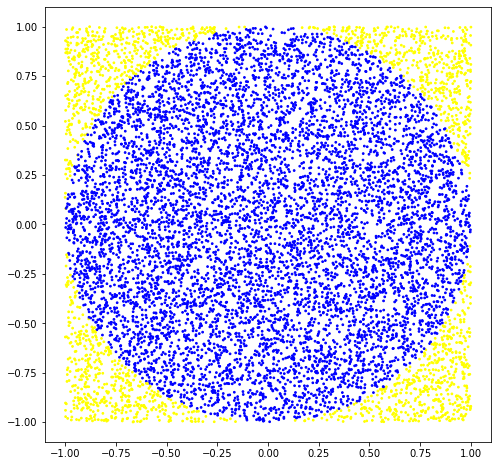

In [12]:
N=10000 #número de intentos
#ayuda plt.figure(figsize=(8,8))
#Primero vamos a hacer 
x =[]
y =[]
c=[]
numCaenDentroCirculo=0
for i in range(0,N):
    x.append(-1+2*random.random())
    y.append(-1+2*random.random())
    if((x[i]**2 + y[i]**2)<=1):
        c.append("blue")
        numCaenDentroCirculo=numCaenDentroCirculo+1
    else:
        c.append("yellow")

pi=(4*numCaenDentroCirculo)/N
print("el numero pi es: " +str(pi))
plt.figure(figsize=(8,8))
plt.scatter(x,y,s=3,c=c)
plt.show()

<img src="f6.png">  

<hr>
<b><font color='red'>Ejercicio 02</font></b> 

Crea un histograma en que se vea la distribución que saldría al sumar dos dados, tiene que verse una gráfica como la que se muestra a continuación

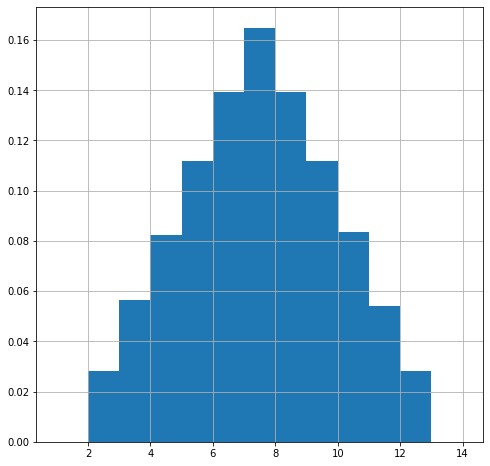

In [13]:
N=100000
suma=[]
elBins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
for i in range(0,N):
    primerDado=random.randint(1,6)
    segundoDado= random.randint(1,6)
    suma.append(primerDado+segundoDado)


plt.figure(figsize=(8,8))
plt.hist(suma,bins=elBins, density=True)
plt.grid()
plt.show()

<img src="f7.png">  

<hr>
<b><font color='red'>Ejercicio 03</font></b> 

Al implementar MD5, obtendremos como resultado, una cadena alfanumérica de 32 caracteres hexadecimales. Ocupando siempre 16 Bytes de memoria. 

El siguiente pin = '4aca32b706287f13903f08b7aab38f79', ha sido codificado con md5 "hashlib.md5(b'****')", para ello han utilizado dos carácteres en mayúsculas ('ABCDEF')  y dos números (0-9) , haz una función que obtenga el pin descodificado utilizando random.

¿Cuántos intentos ha relizado hasta que la ha descubierto?
Reliza el ejercicio varias veces y haz un histograma.



La clave es:  1A2D


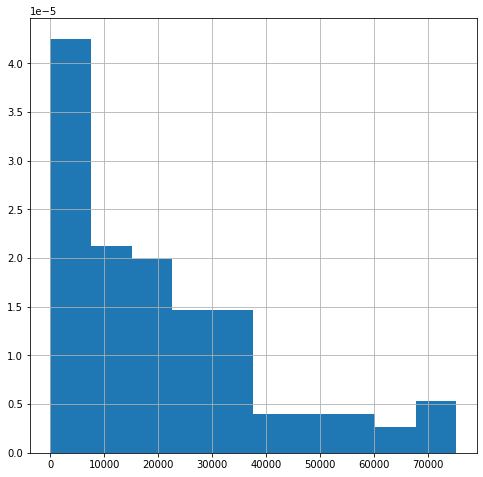

In [14]:
import itertools
#     md5 = hashlib.md5(clave.encode())

pin="4aca32b706287f13903f08b7aab38f79"
sabemosPass=True
letras='ABCDEF'
numeros='1234567890'
pintarClave =""
listIntentos =[]
for j in range (0,100):
    intentos=0
    sabemosPass=True
    while sabemosPass:
        claveArray = [random.choice(letras), random.choice(letras) , random.choice(numeros), random.choice(numeros)]
        permutations = list(itertools.permutations(claveArray, r=4))
        for i in range (0,len(permutations)):
            clave=""
            for j in range(0,4):
                clave += permutations[i][j]
            md5 = hashlib.md5(clave.encode())
            intentos=intentos+1
            if(md5.hexdigest() == pin):
                pintarClave=clave
                listIntentos.append(intentos)
                sabemosPass=False
            
print("La clave es: ", pintarClave)
#Ahora dibujamos el instograma
plt.figure(figsize=(8,8))
plt.hist(listIntentos, density=True)
plt.grid()
plt.show()